<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-daniela-estevez/blob/main/Semana_5_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>

**Materia:** Ciencia y analítica de datos

**Profesor:** Jobish Vallikavungal Devassia

**Fecha:** 11 de Octubre de 2022

## Module 2 - Data Wrangling

In [110]:
#Librerías

import pandas as pd
import numpy as np
import seaborn as sns

In [111]:
#Import dataframe from last module
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

#convierte los datos a un dataframe
df=pd.read_csv(url,header=None)

# Coloca nombres a columnas
headers = ["symboling", "normalized-losses","make", "fuel-type", "aspiration", "num-of-doors","body-style",
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height","curb-weight", "engine-type",
           "num-of-cylinders", "engine-size","fuel-system", "bore", "stroke","compression-ratio", "horsepower","peak-rpm", 
           "city-mpg", "highway-mpg", "price"]

df.columns=headers

### Pre-processing Data in Python


In [112]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [113]:
#simple df operations

#Aumenta en 1 unidad todos los valores de la columna symboling
df["symboling"]=df["symboling"]+1
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,4,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,4,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,3,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Dealing with Missing Values in Python

  -> Drop missing values (drop variable or data entry)

  -> Replace missing values (average, median, frequency, etc)
  
  -> Leaving as missing

In [114]:
# dataframes.dropna() to drop missing values
#axis=0 for rows
#axis=1 for columns
#inplace=True change the dataframe

df.dropna(subset=["price"],axis=0,inplace=True)

In [115]:
#Cambia columnas objeto a numericas
col=("normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price")

for c in col:
  #coverts ? to missing value
  df[c] = df[c].replace('?', np.nan)
  #change data-type
  df[c]=df[c].astype("float64")

In [116]:
#Replace missing values with mean

mean=df["normalized-losses"].mean()
df["normalized-losses"].replace(np.nan,mean)

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

### Data Formatting in Python

In [117]:
# Change mpg to L/100km
df["city-mpg"]=235/df["city-mpg"]

#Rename column
df.rename(columns={"city-mpg":"city-L/100km"},inplace=True)

### Data Normalization

  -> Simple feature scaling 

  -> Min-max
  
  -> Z-score

In [118]:
#Simple feature scaling 
#df["length"]=df["length"]/df["length"].max()

#Min-max
#df["length"]=(df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())


#Z-score
#df["length"]=(df["length"]-df["length"].mean())/df["length"].std()

### Binning in Python

Group values into binns

In [119]:
df["price"]
# Crea 4 numeros con la misma distancia 
bins=np.linspace(min(df["price"]),max(df["price"]),4)

# Crea una lista con los nombres de los grupos
group_names=["Low","Medium","High"]

# Crea los grupos
df["price-binned"]=pd.cut(df["price"],bins,labels=group_names,include_lowest=True)
df["price-binned"].head

<bound method NDFrame.head of 0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 205, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']>

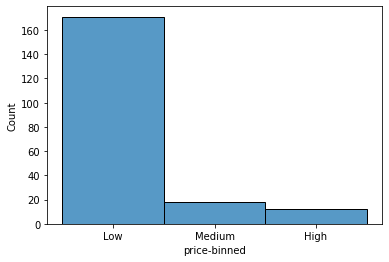

In [120]:
sns.histplot(df["price-binned"])

### Turning categorical varialbes into quantitative variables in Python

In [121]:
# Crea variable indicadora
pd.get_dummies(df["fuel-type"],drop_first=True)

,gas
0,1
1,1
2,1
3,1
4,1
...,...
200,1
201,1
202,1
203,0


### Lab

In [122]:
# Checa si hay datos vacios
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price-binned
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
# Cuenta los datos vacíos
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    205
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Na

In [124]:
#Replace missing values with averages
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)


avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [125]:
#QUESTION 1
# Replace nan values of stroke with average
avg_str=df['stroke'].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg_str, inplace=True)

In [126]:
#Replace missing values with averages
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [127]:
#Replace missing values with most frequent

print(df['num-of-doors'].value_counts())

print(df['num-of-doors'].value_counts().idxmax())

#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

four    114
two      89
?         2
Name: num-of-doors, dtype: int64
four


In [128]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [129]:
# Cuenta valores nulos
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-L/100km         0
highway-mpg          0
price                0
price-binned         0
dtype: int64

In [130]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price-binned
0,4,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,13495.0,Low
1,4,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,16500.0,Low
2,2,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,26,16500.0,Low
3,3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,30,13950.0,Low
4,3,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,22,17450.0,Low


In [131]:
# Checa tipo de datos
df.dtypes

symboling               int64
normalized-losses     float64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-L/100km          float64
highway-mpg             int64
price                 float64
price-binned         category
dtype: object

In [132]:
#Convierte tipos a los correctos
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [133]:
# Checa tipo de datos
df.dtypes

symboling               int64
normalized-losses       int64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-L/100km          float64
highway-mpg             int64
price                 float64
price-binned         category
dtype: object

In [134]:
#Question #2: 
#According to the example above, transform mpg to L/100km in the column of "highway-mpg" 
#and change the name of column to "highway-L/100km".

# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

In [135]:
#Data normalization
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [136]:
#Question #3: 
#According to the example above, normalize the column "height".

# replace (original value) by (original value)/(maximum value)
df['height'] = df['height']/df['height'].max()

In [137]:
#Binning

#Convert to correct type
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

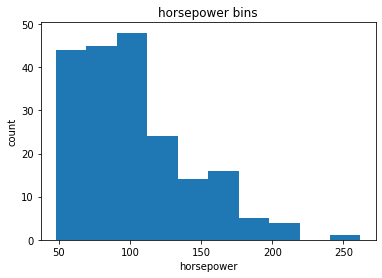

In [138]:
# Graph horsepower

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [139]:
#Create bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

#Create name of bins
group_names = ['Low', 'Medium', 'High']

#Created binned variable
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

#Check result
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

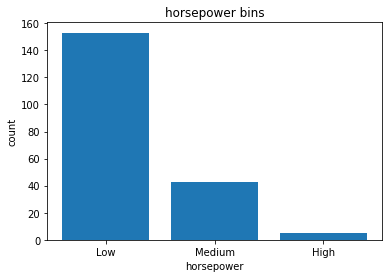

In [140]:
# Graph horsepower

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [141]:
#Question #4: 
#Similar to before, create an indicator variable for the column "aspiration"

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [142]:
#Question #5: 
#Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.

# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [143]:
df.to_csv('clean_df.csv')